# **Lista 1** 
### Rafał Głodek
***

### **Zadanie 1**

#### 1.1 

In [1]:
def wielomian1(wspolczynniki, x):
    """
    Function
    Funkcja obliczająca wartość wielomianu w punkcie
    O złożoności O(n^2) świadczą zagnieżdżone pętle, każda wykonująca n mnożeń (O(n) * O(n) = O(n^2))

    Input
    wspolczynniki(list) - lista wspołczynników posortowanych rozpoczynając od wyrazu wolnego
    x(float) - punkt, w którym chcemy obliczyć wartość wielomianu

    Output
    suma(float) - wartość wielomianu w punkcie

    """
    n = len(wspolczynniki)
    suma = 0
    for i in range(n): #idziemy po koljenych współczynnikach
        xn = 1
        for j in range(i): #potęgowanie x-a
            xn *= x
        suma += wspolczynniki[i] * xn #dodawanie potęgi x-a pomnożonej przez współczynnik
    return suma


In [2]:
print(wielomian1([1,2,3],5))

86


#### 1.2

In [3]:
def potegowanie(a,b):
    """
    Function
    Funkcja efektywnego potęgowania (o złożoności O(logn))

    Input
    a(integer) - podstawa potęgowania
    b(integer) - wykładnik potęgowania

    Output
    a**b(integer) - wynik potęgowania
    """
    if b < 0:
      return potegowanie(1 / a, -b)
    elif b == 0:
        return 1
    elif b % 2 == 0:
        return potegowanie(a * a, b / 2)
    elif b % 2 != 0:
        return a * potegowanie(a * a, (b - 1) / 2)

In [4]:

def wielomian3(wspolczynniki, x):
    """
    Function 
    Funkcja wykorzystująca algorytm divide and conquer do obliczenia wartości wielomianu w punkcie.
    Wykorzystana została tu rekurencja.
    W każdym wywołaniu funkcji wykonujemy efektywne potęgowanie o złożoności O(logn).
    Wejściowy wielomian dzielimy na połowy, obliczamy ich wartość i łączymy go w całość,
    co w konsekwencji daje nam złożoność O(n/2) * O(logn) = O(n) * O(logn) = O(nlogn)

    Input
    wspolczynniki(list) - lista wspołczynników posortowanych rozpoczynając od wyrazu wolnego
    x(float) - punkt, w którym chcemy obliczyć wartość wielomianu

    Output
    suma(float) - wartość wielomianu w punkcie
    """
    n = len(wspolczynniki)
    while n > 1:
        srodek = n // 2

        wsp_lewo = wspolczynniki[:srodek]
        wsp_prawo = wspolczynniki[srodek:]

        wart_lewo = wielomian3(wsp_lewo, x)
        wart_prawo = wielomian3(wsp_prawo, x)

        x_n = potegowanie(x, srodek)
        wynik = wart_lewo + wart_prawo * x_n
        
        return wynik
    return wspolczynniki[0]

In [5]:
print(wielomian3([1,2,3],5))

86


#### 1.3

Wykonujemy:
* mnożenie n razy
* dodawanie n razy

Co w konsekwencji daje nam złożoność
O(n) + O(n) = O(2n) = O(n)

***

### **Zadanie 2**

In [6]:
import random
def gen(start, koniec, n):
    """
    Function 
    Funkcja generująca losowy ciąg n liczb

    Input
    start(integer) - początek zakresu
    koniec(integer) - koniec zakresu
    n(integer) - liczba wyrazów ciągu

    Output 
    wynik(list) - wygenerowany ciąg
    """
    wynik = []
    for i in range(n):
        wynik.append(random.randint(start,koniec))
    return wynik

In [7]:
def example1(S):
    n = len(S)
    total = 0
    for j in range(n):
        total += S[j]
    return total

In [8]:
def example2(S):
    n = len(S)
    total = 0
    for j in range(0, n, 2):
        total += S[j]
    return total

In [9]:
def example3(S):
    n = len(S)
    total = 0
    for j in range(n):
        for k in range(1+j):
            total += S[k]
    return total

In [10]:
def example4(A, B): 
    n = len(A)
    count = 0
    for i in range(n):
        total = 0
        for j in range(n):
            for k in range(1+j):
                total += A[k]
        if B[i] == total:
            count += 1
    return count

#### 2.1

Funkcja mierząca czas

In [11]:
import matplotlib.pyplot as plt
import timeit

def stoper(funkcja, ile, roznica_dlugosci, start, koniec, n_0):
    """
    Function
    Funkcja Licząca czas wykonywania danej funkcji dla rosnących długości ciągów 

    Input
    funkcja(function) - funkcja, której złożoność chcemy sprawdzić
    ile(integer) - dla ilu list chcemy sprawdzić funkcję
    roznica_dlugosci(integer) - o ile mają się różnić długości kolejnych list
    start(integer) - początek zakresu dla losowania listy
    koniec(integer) - koniec zakresu dla losowania listy
    n_0(integer) - długość pierwszej listy

    Output
    czasy1(list) - lista z czasami odpowiadającymi kolejnym długościom 
    
    """
    czasy1 = []
    dlugosc = n_0
    for i in range(ile):
        czasy1.append(timeit.timeit(lambda: funkcja(gen(start, koniec, dlugosc)), number=100))
        dlugosc += roznica_dlugosci
    return czasy1


Hipoteza: Funkcja example1 jest klasy O(n).

Sprawdźmy eksperymentalnie złożoność obliczeniową funkcji example1.

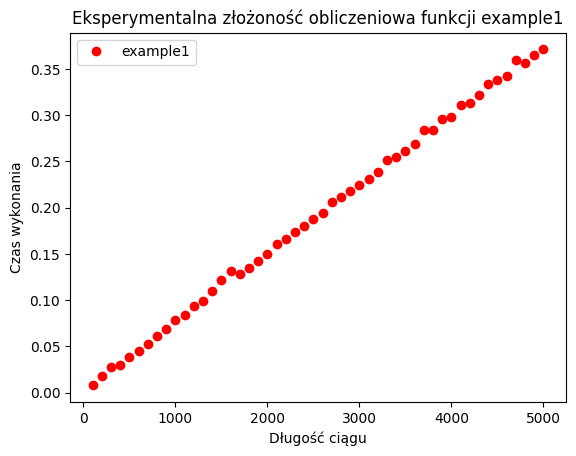

In [14]:
czasy_e1 = stoper(example1, 50, 100, 1, 100, 100)
xs1 = range(100, 5001, 100)
plt.plot(xs1, czasy_e1, "ro", label="example1")
plt.xlabel("Długość ciągu")
plt.ylabel("Czas wykonania")
plt.title("Eksperymentalna złożoność obliczeniowa funkcji example1")
plt.legend(loc="best")
plt.show()

 Widzimy, że wykres przypomina wykres funkcji liniowej

 Teraz pokażmy tę złożoność na wykresie w skali log-log

In [15]:
from scipy.optimize import curve_fit
def liniowa(x,a,b):
    return a*x + b

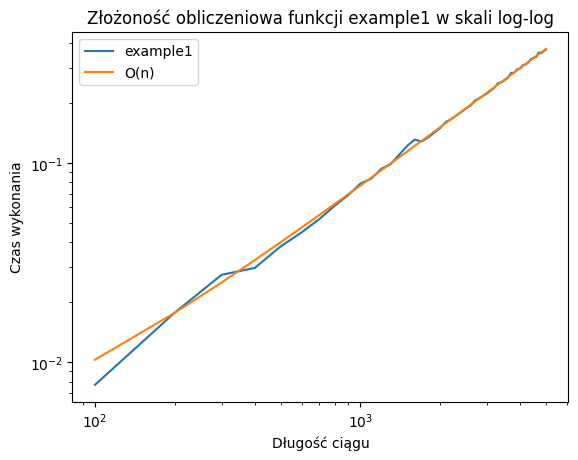

In [16]:
popt1, pcov1 = curve_fit(liniowa, xs1, czasy_e1)
plt.loglog(xs1, czasy_e1, label = "example1")
plt.loglog(xs1, liniowa(xs1,*popt1), label = "O(n)")
plt.xlabel("Długość ciągu")
plt.ylabel("Czas wykonania")
plt.title("Złożoność obliczeniowa funkcji example1 w skali log-log")
plt.legend(loc='best')
plt.show()

Widzimy, że krzywe wyglądają podobnie, a ich kąt nachylenia stabilizuje się na podobnym poziomie. 
Można, więc potweirdzić hipotezę, że złożoność obliczeniowa funkcji example1 wynosi O(n)

#### 2.2

Hipoteza: Funkcja example2 jest klasy O(n)

Sprawdźmy złożoność eksperymentalnie dla funkcji example2

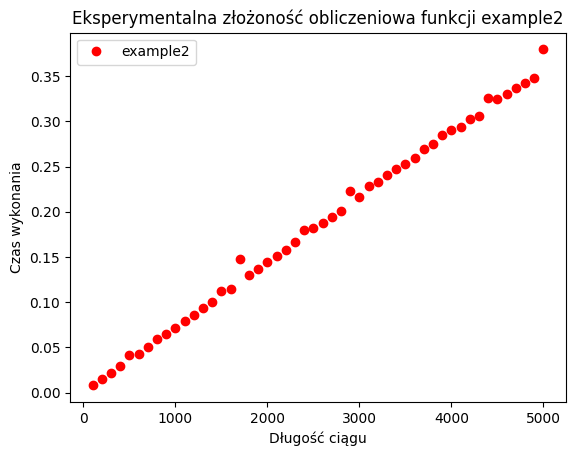

In [19]:
czasy_e2 = stoper(example2, 50, 100, 1, 100, 100)
xs2 = range(100, 5001, 100)
plt.plot(xs2, czasy_e2, "ro",label="example2")
plt.xlabel("Długość ciągu")
plt.ylabel("Czas wykonania")
plt.title("Eksperymentalna złożoność obliczeniowa funkcji example2")
plt.legend(loc="best")
plt.show()

Tutaj również widzimy, że krzywa przypomina funkcję liniową

Sprawdźmy ją również w skali log-log

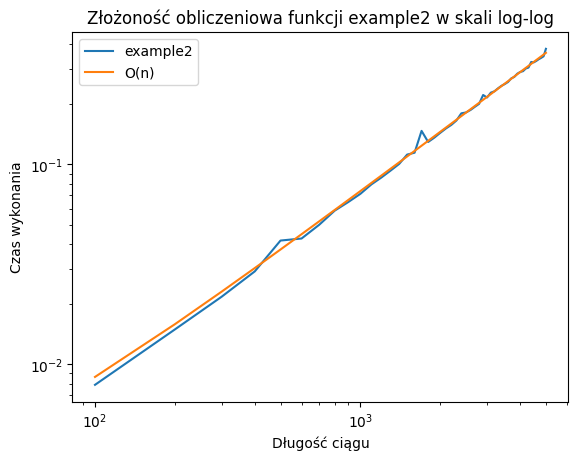

In [20]:
popt2, pcov2 = curve_fit(liniowa, xs2, czasy_e2)
plt.loglog(xs2, czasy_e2, label = "example2")
plt.loglog(xs2, liniowa(xs2,*popt2), label = "O(n)")
plt.xlabel("Długość ciągu")
plt.ylabel("Czas wykonania")
plt.title("Złożoność obliczeniowa funkcji example2 w skali log-log")
plt.legend(loc='best')
plt.show()

Podobnie jak w poprzednim przypadku, tutaj również krzywe podobnie się stabilizują, co potwierdza, że złożoność example2 wynosi O(n).

#### 2.3

Hipoteza: Funkcja example3 jest klasy O(n^2)

Zastosujmy funkcję stoper dla example3

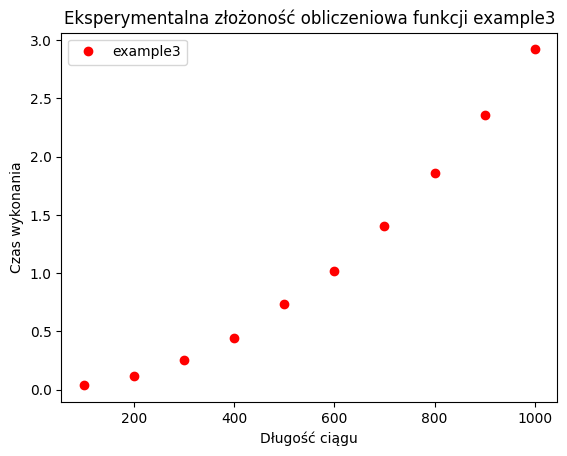

In [21]:
czasy_e3 = stoper(example3, 10, 100, 1, 100, 100)
xs3 = range(100, 1001, 100)
plt.plot(xs3, czasy_e3, "ro", label="example3")
plt.xlabel("Długość ciągu")
plt.ylabel("Czas wykonania")
plt.title("Eksperymentalna złożoność obliczeniowa funkcji example3")
plt.legend(loc="best")
plt.show()

Widzimy, że krzywa przypomina parabolę

Sprawdźmy ją w skali log-log

In [22]:
def kwadratowa(x,a,b,c):
    return a*x*x + b*x + c

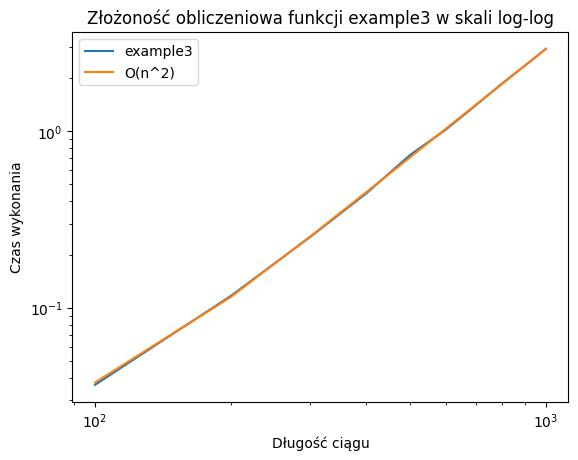

In [23]:

popt3, pcov3 = curve_fit(kwadratowa, xs3, czasy_e3)
plt.loglog(xs3, czasy_e3, label = "example3")
plt.loglog(xs3, kwadratowa(xs3,*popt3), label = "O(n^2)")
plt.xlabel("Długość ciągu")
plt.ylabel("Czas wykonania")
plt.title("Złożoność obliczeniowa funkcji example3 w skali log-log")
plt.legend(loc='best')
plt.show()

Krzywe po czasie są podobne, więc możemy potwierdzić hipotezę, że funkcja example3 jest klasy O(n^2).

#### 2.4

Hipoteza: Funkcja example4 jest klasy O(n^3)

Sprawdźmy to eksperymentlanie za pomocą lekko zmodyfikowanej wersji funkcji stoper()

In [24]:
def stoper2(funkcja, ile, roznica_dlugosci, start, koniec, n_0):
    czasy1 = []
    dlugosc = n_0
    for i in range(ile):
        czasy1.append(timeit.timeit(lambda: funkcja(gen(start, koniec, dlugosc), gen(start, koniec, dlugosc)), number=100))
        dlugosc += roznica_dlugosci
    return czasy1

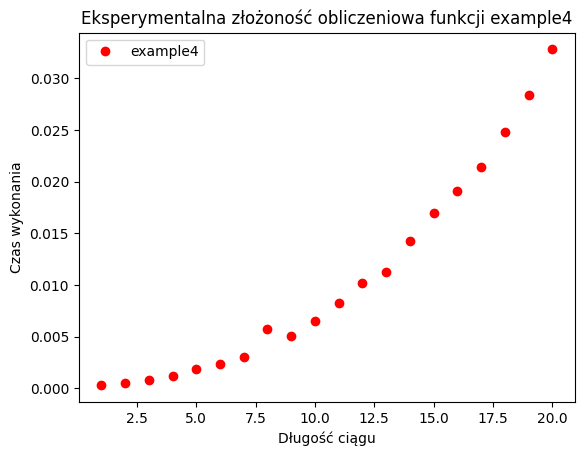

In [30]:

czasy_e4 = stoper2(example4, 20, 1, 1, 100, 1)
xs4 = range(1, 21, 1)
plt.plot(xs4, czasy_e4, "ro", label="example4")
plt.xlabel("Długość ciągu")
plt.ylabel("Czas wykonania")
plt.title("Eksperymentalna złożoność obliczeniowa funkcji example4")
plt.legend(loc="best")
plt.show()

Widzimy, że krzywa przypomina parabolę sześcienną

Sprawdźmy ją również w skali log-log

In [31]:
def szescian(x,a,b,c,d):
    return a*x*x*x + b*x*x + c*x + d

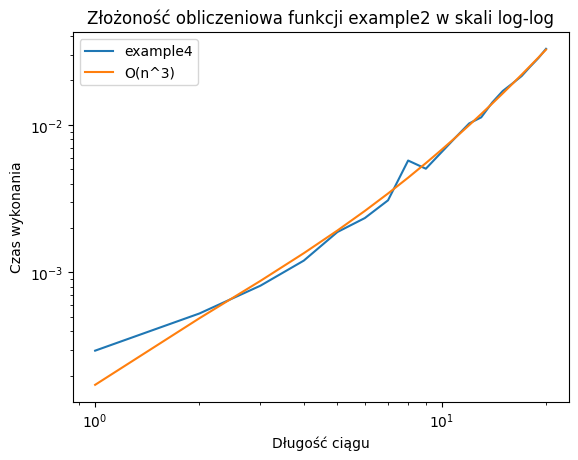

In [33]:
popt4, pcov4 = curve_fit(szescian, xs4, czasy_e4)
plt.loglog(xs4, czasy_e4, label = "example4")
plt.loglog(xs4, szescian(xs4,*popt4), label = "O(n^3)")
plt.xlabel("Długość ciągu")
plt.ylabel("Czas wykonania")
plt.title("Złożoność obliczeniowa funkcji example2 w skali log-log")
plt.legend(loc='best')
plt.show()

Krzywe po czasie pokrywają się. Potwierdzamy więc hipotezę, że funkcja example4 jest klasy O(n^3).
***

### **Zadanie 3**

W tym zadaniu skorzystamy w dużej mierze z tego, co zrobiliśmy w zadaniu poprzednim. Analizę eksperymetnalną przeprowadzimy również za pomocą funkcji stoper().

Hipoteza: Funkcja sorted() jest klasy O(nlogn)

In [37]:
czasy = stoper(sorted, 50, 100, 1, 20000, 1)
xs = range(1, 5001, 100)

Dopasujmy do danych krzywą logarytmiczną

In [35]:
import numpy as np
def nlogn(x,a,b,c):
    return a*x*np.log(x+b) + c

In [38]:
popt, pcov = curve_fit(nlogn, xs, czasy)

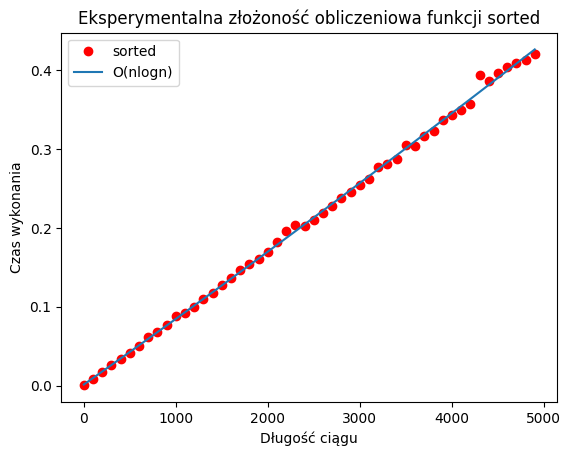

In [162]:
plt.plot(xs, czasy, "ro", label="sorted")
plt.xlabel("Długość ciągu")
plt.ylabel("Czas wykonania")
plt.title("Eksperymentalna złożoność obliczeniowa funkcji sorted")
plt.plot(xs, nlogn(xs, *popt), label="O(nlogn)")
plt.legend(loc="best")
plt.show()

Krzywe dopasowują się niemal idealnie. Sprawdźmy dla pewności, jak wygląda to w skali log-log

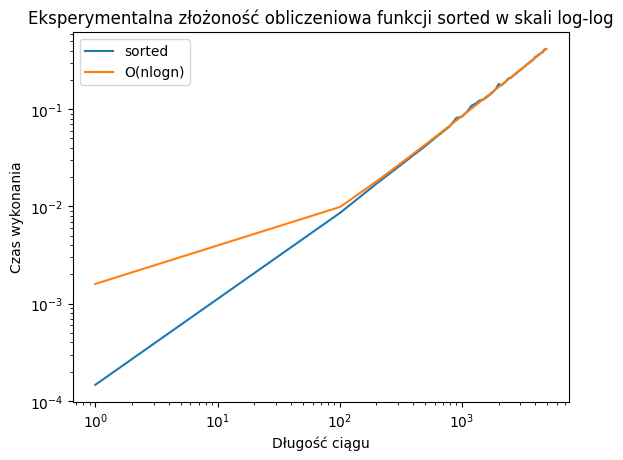

In [39]:
plt.loglog(xs, czasy, label="sorted")
plt.xlabel("Długość ciągu")
plt.ylabel("Czas wykonania")
plt.title("Eksperymentalna złożoność obliczeniowa funkcji sorted w skali log-log")
plt.loglog(xs, nlogn(xs, *popt), label="O(nlogn)")
plt.legend(loc="best")
plt.show()

Widzimy, że po czasie tu również się pokrywają. Możemy więc potwierdzić hipotezę, że funkcja sorted jest klasy O(nlogn).